In [1]:
import pandas as pd
import numpy as np


# Read the first CSV file
df1 = pd.read_excel('QVI_transaction_data.xlsx')

# Read the second CSV file
df2 = pd.read_csv('QVI_purchase_behaviour.csv')


In [2]:
print(df1.head()) 


    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  


In [3]:
outlier = df1[df1['TOT_SALES'] >30]
print(outlier)

        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762  43331        226          226000  226201         4   
69763  43605        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [4]:
df1 = df1[df1['TOT_SALES'] < 30]


In [5]:
df1.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [6]:
try:
    df1['DATE'] = pd.to_datetime(df1['DATE'], origin='1899-12-30', unit='D', errors='raise')
    print("The date column does not contain any errors.")
except ValueError:
    error_rows = df1.loc[pd.to_datetime(df1['DATE'], errors='coerce').isnull()]
    if not error_rows.empty:
        print("The date column contains errors. Error rows:")
        print(error_rows)

The date column does not contain any errors.


In [7]:
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [7]:
df1.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [23]:
product_names = df1['PROD_NAME'].unique()
print(product_names)

['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Red Rock 

In [8]:
df1 = df1[df1['PROD_NAME'].str.contains(r'\b\w*(?:chip|chp)\w*\b', case=False, regex=True)]
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
...,...,...,...,...,...,...,...,...
264816,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6
264824,2019-03-13,272,272193,269906,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,1,4.6
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6


In [9]:
date_sum = df1['DATE'].nunique()

print("Sum of distinct dates:", date_sum)

Sum of distinct dates: 364


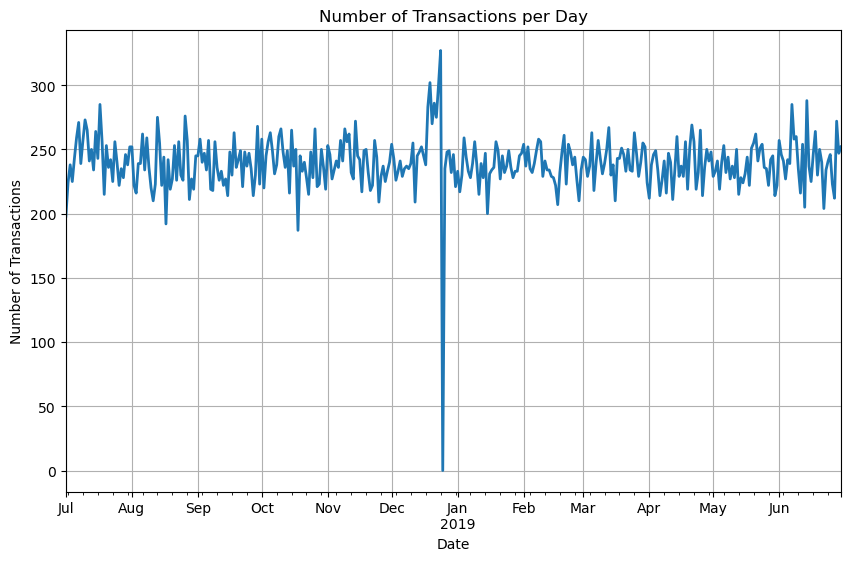

In [10]:
import matplotlib.pyplot as plt

# Set the date column as the index
df1.set_index('DATE', inplace=True)

# Resample the data to daily frequency and count the number of transactions per day
daily_transactions = df1.resample('D').size()

# Plot the number of transactions per day
plt.figure(figsize=(10, 6))
daily_transactions.plot(kind='line', linewidth=2)
plt.title('Number of Transactions per Day')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()


In [14]:
import re
# Function to parse the number from the product name
def parse_number(product_name):
    # Extract digits using regular expression
    digits = re.findall(r'\d+', str(product_name))
    # Join the extracted digits and convert to float
    number = int(''.join(digits))
    return number

# Create the pack size column by parsing the number from the product name
df1['PACK_SIZE'] = df1['PROD_NAME'].apply(parse_number)
df1

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
DATE,,,,,,,,
2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150
2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330
...,...,...,...,...,...,...,...,...
2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110
2019-03-13,272,272193,269906,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,1,4.6,150
2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110


In [15]:
df2

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [16]:
merged_df = df1.merge(df2, on='LYLTY_CARD_NBR', how='left')


In [17]:
merged_df

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,YOUNG SINGLES/COUPLES,Premium
1,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,MIDAGE SINGLES/COUPLES,Budget
2,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,MIDAGE SINGLES/COUPLES,Budget
3,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,MIDAGE SINGLES/COUPLES,Budget
4,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
87328,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110,YOUNG SINGLES/COUPLES,Premium
87329,272,272193,269906,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,1,4.6,150,YOUNG SINGLES/COUPLES,Premium
87330,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110,YOUNG SINGLES/COUPLES,Premium
87331,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,175,YOUNG SINGLES/COUPLES,Premium
